# Bootstrap Confidence Interval plot as shaded area around the mean

Source for bootstrap statistics: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [4]:
def compute_CI(data, metric=np.mean, confidence_level=0.95, axis=-1, n_resamples=999, **kwargs):
    """
    data: np.array of shape (timesteps, sample_size) (second dim. is the number of runs for ex.)
    
    Returns:
    --------
    ci_l : np.array of shape (timesteps,)
    ci_u: np.array of shape (timesteps,)
    """
    res = bootstrap((data,), metric, confidence_level=confidence_level, axis=axis, n_resamples=n_resamples, **kwargs)
    ci_l, ci_u = res.confidence_interval
    return ci_l, ci_u

In [5]:
def plot_mean_with_CI(data, confidence_level=0.95, axis=-1, n_resamples=999, **kwargs):
    ci_l, ci_u = compute_CI(data, metric=np.mean, confidence_level=0.95, axis=-1, n_resamples=999, **kwargs)
    mean_value = np.mean(data, axis=-1)
    x_axis = np.arange(len(mean_value))
    plt.plot(x_axis, mean_value)
    plt.fill_between(x_axis, ci_l, ci_u, color='b', alpha=.1)

## Demonstration: noisy syntetic runs (linear growth in the number of steps + gaussian noise)

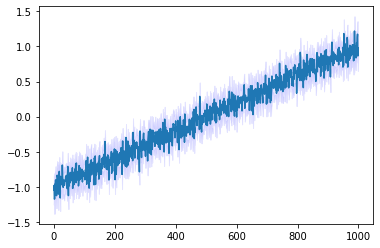

In [10]:
timesteps = 1000
n_runs = 100
x = np.linspace(-1,1,timesteps).reshape(-1,1)
noise = np.random.normal(size=(timesteps, n_runs))
data = x + noise

plot_mean_with_CI(data)